#### The following is a database of selected attributes of heart disease patients collected from several hospitals, collated on to kaggle.com (shorturl.at/tvzV3)


Attributes include:

Age: age of the patient in years

Sex: sex of the patient (M/F)

ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

RestingBP: resting blood pressure (mm Hg)

Cholesterol: serum cholesterol (mm/dl)

FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)

RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)

MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)

ExerciseAngina: exercise-induced angina (Y: Yes, N: No)

Oldpeak: oldpeak = ST (Numeric value measured in depression)

ST_Slope: the slope of the peak exercise ST segment - tolerance to exercise, flat and down often indicate heart issues
    (Up: upsloping, Flat: flat, Down: downsloping)

HeartDisease:
    0: Patient is healthy,
    1: Patient has heart disease

In [ ]:
# summary stats including reference mmHG

In [3]:
# load the libraries and data
import pandas as pd
import numpy as np
import seaborn as sns

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [ ]:
data = pd.read_csv('heart.csv')

In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


For the model to be able to interpret them we need to convert categorical variables into dummies, including:

    - Sex
    - ChestPainType
    - RestingECG
    - ExerciseAngina
    - ST_Slope	

We add n-1 dummies for every category in order to avoid the perfect multicollinearity trap

In [6]:
# example dummies for gender
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,M
0,1
1,0
2,1
3,0
4,1


In [7]:
# making dummies for the remaining variables
ChestPainType = pd.get_dummies(data['ChestPainType'],drop_first=True)
RestingECG = pd.get_dummies(data['RestingECG'],drop_first=True)
ExerciseAngina = pd.get_dummies(data['ExerciseAngina'],drop_first=True)
ST_Slope = pd.get_dummies(data['ST_Slope'],drop_first=True)

In [8]:
# removing the old variables
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], axis=1, inplace=True)

In [9]:
# adding back the new ones
datan = data.join((sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope))

In [10]:
# 'Oldpeak' is also omitted becuase that variable is already expressed by 'ST_Slope'
datan.drop(['Oldpeak'],axis=1, inplace=True)

In [11]:
#All done!
datan.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,1,0,1,0,1,0,0,0,1


In [12]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Exploring the data

Below we can see that the data has a bias towards older patients, seeing as the mean age is 53 years and the middle 50% (interquartile range) is firmly middle aged as it is between 47-60 years. This is no surpise as one would expect that most people who get a check-up in the hospital are the ones who are more likely have illnesses at all (regardless if their illness is actually heart disease or not).

,Age
count,918.000000
mean,53.510893
std,9.432617
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


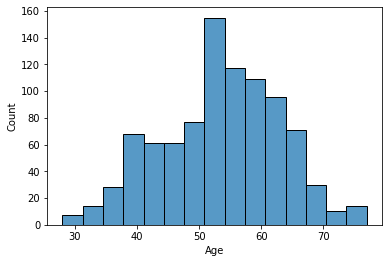

In [14]:
sns.histplot(data['Age'],bins=15)
data[['Age']].describe()

### Building the model

In [16]:
# designating the train test split
from sklearn.model_selection import train_test_split

In [17]:
print(datan.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease',
       'M', 'ATA', 'NAP', 'TA', 'Normal', 'ST', 'Y', 'Flat', 'Up'],
      dtype='object')


In [18]:
X = datan.drop(columns=['HeartDisease'])
y = datan['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# setting up the logistic regression itself

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(max_iter=1000) # this data set needed more iterations than the defualt allowance
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
import statsmodels.api as sm
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.329811
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      904
Method:                           MLE   Df Model:                           13
Date:                Tue, 26 Oct 2021   Pseudo R-squ.:                  0.5202
Time:                        10:10:42   Log-Likelihood:                -302.77
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                6.425e-132
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age             0.0166      0.010      1.596      0.110      -0.004       0.037
RestingBP       0.0035    

A different library is used here because sklearn doesn't calculate p-values (the results are approximately the same for both libraries). When adopting the 5% level of signficicance, we see that the following factors have a statistically signficant relationship on whether a patient develops heart disease:

    - Cholesterol
    - FastingBS
    - Sex
    - ChestPainType
    - ExerciseAngina
    - ST_Slope
    
Leaving the below in order of p-values; that is that the coefficients for the following variables are not signficiantly different from zero. 

    - RestingBP (0.51)
    - RestingECG (0.274 and 0.275)
    - MaxHR (0.18)
    - Age (0.11)

The ones with the highest p-values are removed until only significant variables remain. For the sake of brevity I won't show each regression. The cell below shows the results after redundant variables are iteratively removed except 'Age' whose p-value improves beyond the 5% threshold (to 3.9%).

### Results

In [ ]:
kjm
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.331638
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      908
Method:                           MLE   Df Model:                            9
Date:                Tue, 26 Oct 2021   Pseudo R-squ.:                  0.5176
Time:                        10:34:25   Log-Likelihood:                -304.44
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                7.711e-135
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age             0.0150      0.007      2.065      0.039       0.001       0.029
Cholesterol    -0.0043    

In [ ]:
# here we can see the predicted diagnoses of the model vs. the actual diagnoses
predictions = logmodel.predict(X_test)
preddf = pd.DataFrame(predictions,columns=['Predictions'])
preddf = preddf.join(datan['HeartDisease'])
preddf

,Predictions,HeartDisease
0,0,0
1,1,1
2,0,0
3,1,1
4,1,0
...,...,...
179,0,0
180,0,1
181,1,0
182,0,1


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
cmdf = pd.DataFrame(data=confusion_matrix(y_test,predictions), columns=['Predicted healthy','Predicted disease'], index=['True healthy','True disease'])
cmdf

,Predicted healthy,Predicted disease
True healthy,62,17
True disease,18,87


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        79
           1       0.84      0.83      0.83       105

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



In [19]:
### neural network

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [56]:
model = Sequential()
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [57]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=130,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/130
23/23 [==============================] - 1s 8ms/step - loss: 0.7542 - val_loss: 0.6766
Epoch 2/130
23/23 [==============================] - 0s 2ms/step - loss: 0.7082 - val_loss: 0.6405
Epoch 3/130
23/23 [==============================] - 0s 3ms/step - loss: 0.6738 - val_loss: 0.6174
Epoch 4/130
23/23 [==============================] - 0s 3ms/step - loss: 0.6469 - val_loss: 0.5967
Epoch 5/130
23/23 [==============================] - 0s 3ms/step - loss: 0.6282 - val_loss: 0.5755
Epoch 6/130
23/23 [==============================] - 0s 2ms/step - loss: 0.6132 - val_loss: 0.5553
Epoch 7/130
23/23 [==============================] - 0s 2ms/step - loss: 0.5896 - val_loss: 0.5379
Epoch 8/130
23/23 [==============================] - 0s 2ms/step - loss: 0.5973 - val_loss: 0.5195
Epoch 9/130
23/23 [==============================] - 0s 2ms/step - loss: 0.5654 - val_loss: 0.5043
Epoch 10/130
23/23 [==============================] - 0s 3ms/step - loss: 0.5391 - val_loss: 0.4870
Epoch 11/

In [58]:
model_loss = pd.DataFrame(model.history.history)

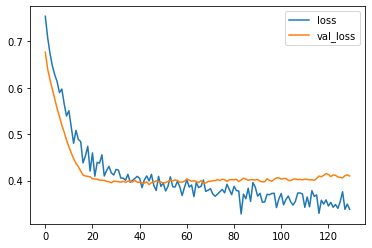

In [59]:
model_loss.plot()

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test,y_pred))

[[60 19]
 [18 87]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        79
           1       0.82      0.83      0.82       105

    accuracy                           0.80       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



Almost exactly the same results as the logistic regression